## Import necessary libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

np.random.seed(42)

#### define a function to fix colour issue to ensure colours are correctly seen in matplotlib

In [2]:
# routine to fix colour
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 1. Input video

#### now importing and displaying the video

In [3]:
#Take a look at the input video
from IPython.display import Video

Video("C:\\Users\\Chaitra\\Downloads\\Relaxing highway traffic1.mp4", embed = True)

## 2. Extract background 

#### now we are capturing 30 random frames from the video and storing them in the dictionary/array frames

In [4]:
video_stream = cv2.VideoCapture('C:\\Users\\Chaitra\\Downloads\\Relaxing highway traffic1.mp4')

# Randomly select 30 frames
frameIds = video_stream.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=30)

# Store selected frames in an array
frames = []
for fid in frameIds:
    video_stream.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = video_stream.read()
    frames.append(frame)
    
video_stream.release()

#### now we will use a filtering technique in order to find a background without moving objects. we are using median of every frame in order to find the background without moving objects.

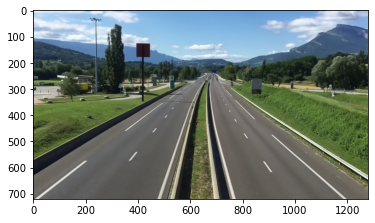

In [5]:
# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(fixColor(medianFrame))

#### we also can use mean or average technique in order to get a background without moving objects.

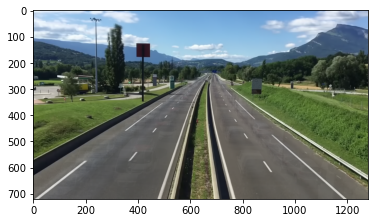

In [6]:
# Calculate the average along the time axis
avgFrame = np.average(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(fixColor(avgFrame))

## 3. Processing a frame

#### now considering the first frame out of 30 frames

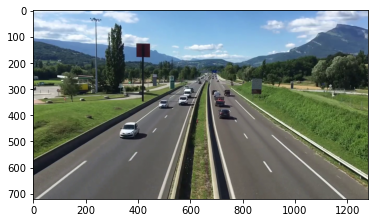

In [7]:
sample_frame=frames[0]
plt.imshow(fixColor(sample_frame))

#### it is convenient to work with grayscale image. so we are converting the median image into grayscale.

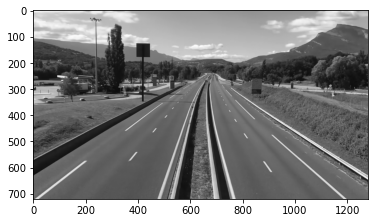

In [8]:
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(grayMedianFrame))

#### also converting the first image to grayscale image

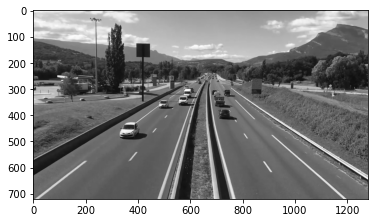

In [9]:
graySample=cv2.cvtColor(sample_frame, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(graySample))

## 4. Remove the background

#### now we are removing the background, so we can see the grey images of cars.

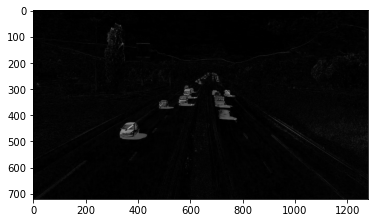

In [10]:
dframe = cv2.absdiff(graySample, grayMedianFrame)
plt.imshow(fixColor(dframe))

## 5. Blurring

#### we have 3 types of blurring techniques -
#### a. Gaussian Blurring
#### b. Median Blurring
#### c. Bilateral Blurring


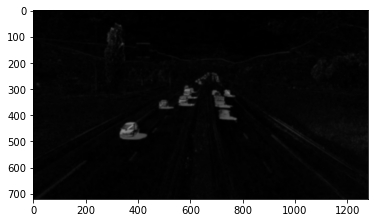

In [11]:
# Gaussian Blurring
blurred = cv2.GaussianBlur(dframe, (11,11), 0)
plt.imshow(fixColor(blurred))

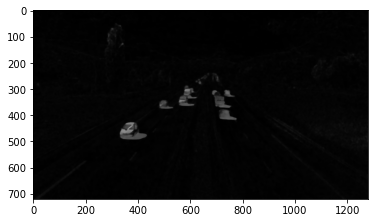

In [12]:
# Median Blurring
blurred2 = cv2.medianBlur(dframe, 7)
plt.imshow(fixColor(blurred2))

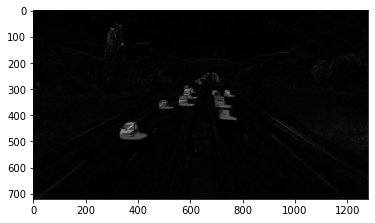

In [13]:
# Bilateral Blurring
blurred3 = cv2.bilateralFilter(dframe, 9, 11,11)
plt.imshow(fixColor(blurred3))

### 6. Thresholding

**Thresholding is used to clearly bring out the moving objects. here we are using OTSU thresholding which will automatically figure out correct threshold levels.**

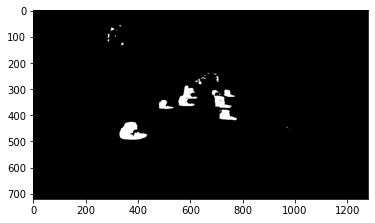

In [14]:
ret, tframe= cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(fixColor(tframe))

## 7. Contours and bounding boxes

#### we are now creating contours and bounding boxes using the threshold pictures

In [15]:
(cnts, _) = cv2.findContours(tframe.copy(), cv2.RETR_EXTERNAL, 
                             cv2 .CHAIN_APPROX_SIMPLE)

**Here we are assuming all the moving objects above 200 in y-axis to be disregarded**

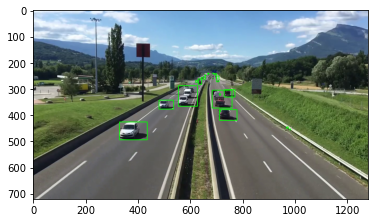

In [16]:
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    if y > 200:  #Disregard item that are the top of the picture
        cv2.rectangle(sample_frame,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(fixColor(sample_frame))

**we will first declare the output video as the output video . we will use inbuilt CV2 and create MP4 video with 30 fps and frame size we will consider as 640 * 480.**

In [17]:
writer = cv2.VideoWriter("output.mp4", 
                         cv2.VideoWriter_fourcc(*"MP4V"), 30,(640,480))

In [18]:
#Create a new video stream and get total frame count
video_stream = cv2.VideoCapture('C:\\Users\\Chaitra\\Downloads\\Relaxing highway traffic1.mp4')
total_frames=video_stream.get(cv2.CAP_PROP_FRAME_COUNT)
total_frames

906.0

## 8. Now applying all the steps to the video.

**we are creating a loop in order to repeat the process for all the total frames(906) created and at last the output of the video is created.**

In [19]:
frameCnt=0
while(frameCnt < total_frames-1):

    frameCnt+=1
    ret, frame = video_stream.read()

    # Convert current frame to grayscale
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and
    # the median frame
    dframe = cv2.absdiff(gframe, grayMedianFrame)
    # Gaussian
    blurred = cv2.GaussianBlur(dframe, (11, 11), 0)
    #Thresholding to binarise
    ret, tframe= cv2.threshold(blurred,0,255,
                               cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #Identifying contours from the threshold
    (cnts, _) = cv2.findContours(tframe.copy(), 
                                 cv2.RETR_EXTERNAL, cv2 .CHAIN_APPROX_SIMPLE)
    #For each contour draw the bounding bos
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        if y > 200: # Disregard items in the top of the picture
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    writer.write(cv2.resize(frame, (640,480)))
 
#Release video object
video_stream.release()
writer.release()